# Dependencies

In [1]:
# Save the env file as .env 

%load_ext dotenv
%dotenv

In [2]:
%pip install 'qiskit[visualization]' qiskit-ibm-runtime matplotlib pylatexenc numpy python-dotenv qiskit-transpiler-service qiskit_aer --quiet --upgrade

import os
from qiskit_ibm_runtime import QiskitRuntimeService # type: ignore
 
def get_instance(plan="free"):
    if plan == "free":
        env_var = "IBM_QUANTUM_INSTANCE_FREE"
    else:
        env_var = "IBM_QUANTUM_INSTANCE_PREMIUM"
    return os.environ.get(env_var)
    

channel = os.environ.get("IBM_QUANTUM_CHANNEL")
instance = get_instance()
url = os.environ.get("IBM_QUANTUM_URL")
token = os.environ.get("IBM_QUANTUM_TOKEN")
name = "qgss24"

QiskitRuntimeService.save_account(
    channel=channel,
    token=token,
    instance=instance,
    name=name,
    set_as_default=True,
    overwrite=True,
)

service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)


Note: you may need to restart the kernel to use updated packages.


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Build a circuit with qiskit SDK

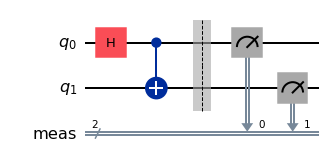

In [7]:
from qiskit import QuantumCircuit, QuantumRegister # type: ignore

qubits = QuantumRegister(2, name="q")
circuit = QuantumCircuit(qubits)

q0, q1 = qubits
circuit.h(q0)
circuit.cx(q0, q1)
circuit.measure_all()

circuit.draw("mpl")

# Transpilation

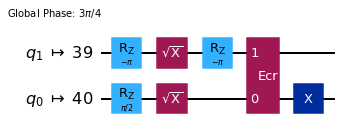

In [6]:
from qiskit import QuantumCircuit, QuantumRegister # type: ignore
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager # type: ignore
from qiskit_ibm_runtime import QiskitRuntimeService # type: ignore

qubits = QuantumRegister(2, name="q")
circuit = QuantumCircuit(qubits)

q0, q1 = qubits
circuit.h(q0)
circuit.cx(q0, q1)

pass_manager = generate_preset_pass_manager(optimization_level=3, backend=backend)
isa_manager = pass_manager.run(circuit)

isa_manager.draw("mpl", idle_wires=False)

# Simulation

In [33]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit.visualization import plot_histogram


# Bell Circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

fake_manila = FakeManilaV2()
pm = generate_preset_pass_manager(backend=fake_manila, optimization_level=1)
isa_qc = pm.run(qc)

options = {"simulator": {"seed_simulator": 42}}
sampler = Sampler(mode=fake_manila, options=options)
 
result = sampler.run([isa_qc]).result()

result

PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=1024, num_bits=2>)))], metadata={})